In [4]:
library(datarium)

In [2]:
library(rstatix)


Attaching package: 'rstatix'


The following object is masked from 'package:stats':

    filter




In [3]:
library(ggpubr)

Loading required package: ggplot2



In [5]:
data("performance", package = "datarium")

In [5]:
performance

id,gender,stress,t1,t2
<int>,<fct>,<fct>,<dbl>,<dbl>
1,male,low,5.964417,5.578506
2,male,low,5.506574,5.819924
3,male,low,5.625011,5.471414
4,male,low,5.710243,5.786593
5,male,low,5.736350,5.718538
6,male,low,5.616418,5.680656
7,male,low,5.476803,5.598871
8,male,low,5.644752,5.919890
9,male,low,6.057531,5.839342


In [8]:
library(tidyverse)

In [7]:
performance = performance %>% select(id, gender, stress, t2) %>% rename(score = t2)

In [9]:
performance

id,gender,stress,score
<int>,<fct>,<fct>,<dbl>
1,male,low,5.578506
2,male,low,5.819924
3,male,low,5.471414
4,male,low,5.786593
5,male,low,5.718538
6,male,low,5.680656
7,male,low,5.598871
8,male,low,5.919890
9,male,low,5.839342


# Preprocessing


In [13]:
performance %>% group_by(gender, stress) %>% get_summary_stats(score)

gender,stress,variable,n,min,max,median,q1,q3,iqr,mad,mean,sd,se,ci
<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
male,low,score,10,5.471,5.920,5.700,5.584,5.812,0.228,0.179,5.699,0.143,0.045,0.102
male,moderate,score,10,5.528,6.016,5.768,5.691,5.836,0.146,0.135,5.769,0.155,0.049,0.111
male,high,score,10,5.295,5.865,5.683,5.493,5.801,0.308,0.210,5.637,0.195,0.062,0.140
female,low,score,10,5.572,6.151,5.738,5.696,5.864,0.168,0.090,5.782,0.165,0.052,0.118
female,moderate,score,10,5.317,6.016,5.523,5.463,5.838,0.374,0.158,5.618,0.252,0.080,0.181
female,high,score,10,5.061,5.769,5.343,5.133,5.418,0.284,0.256,5.336,0.232,0.073,0.166


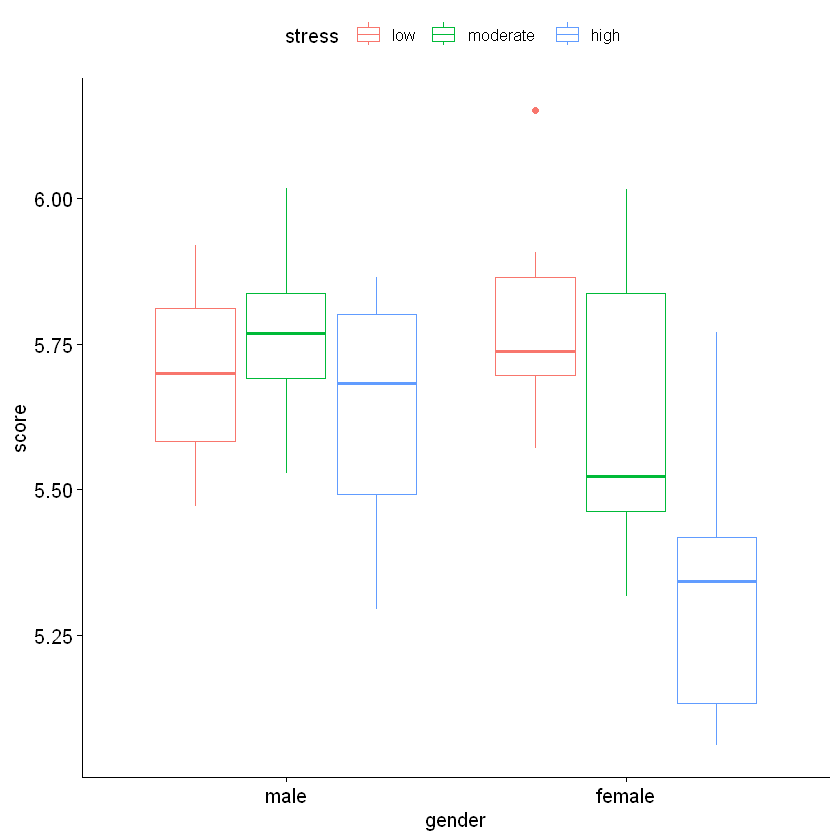

In [14]:
ggboxplot(performance, x= "gender", y = "score", color = "stress")

In [15]:
performance %>% group_by(gender,stress) %>% identify_outliers(score)

gender,stress,id,score,is.outlier,is.extreme
<fct>,<fct>,<int>,<dbl>,<lgl>,<lgl>
female,low,36,6.151016,TRUE,FALSE


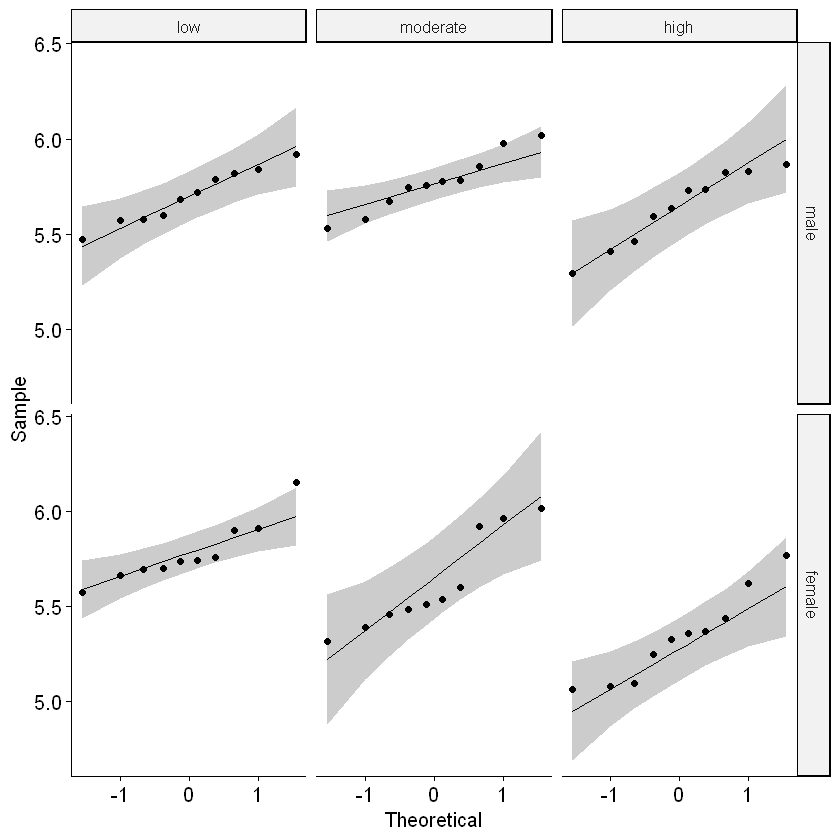

In [17]:
ggqqplot(performance, "score") + facet_grid(gender ~ stress)

In [18]:
performance %>% group_by(gender, stress) %>% shapiro_test(score)

gender,stress,variable,statistic,p
<fct>,<fct>,<chr>,<dbl>,<dbl>
male,low,score,0.9657807,0.84920900
male,moderate,score,0.9578821,0.76147966
male,high,score,0.9252528,0.40285205
female,low,score,0.8863373,0.15415318
female,moderate,score,0.8652560,0.08798011
female,high,score,0.9304105,0.45194229


In [21]:
performance %>% levene_test(score ~ gender * stress)

df1,df2,statistic,p
<int>,<int>,<dbl>,<dbl>
5,54,0.7218618,0.6099186


In [23]:
performance %>% anova_test(score ~ gender * stress)

,Effect,DFn,DFd,F,p,p<.05,ges
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,gender,1,54,5.972,0.018000,*,0.100
2,stress,2,54,9.599,0.000271,*,0.262
3,gender:stress,2,54,4.947,0.011000,*,0.155


# Post-hoc tests

## از اونجایی که برای تست تعقیبی گرفتن این دو حالت داریم، یک اینکه جنسیت رو ثابت فرض کنیم و سطح استرس و تصمیم گیری رو مقایسه کنیم، دو اینکه سطح استرس رو ثابت بگیریم و جنسیت و تصمیم‌گیری رو مقایسه کنیم
### لذا دو بار آنوای یک راهه میگیریم

In [24]:
performance %>% group_by(gender) %>% anova_test(score ~ stress)

,gender,Effect,DFn,DFd,F,p,p<.05,ges
,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,male,stress,2,27,1.566,0.227000,,0.104
2,female,stress,2,27,10.530,0.000416,*,0.438


In [25]:
performance %>% group_by(stress) %>% anova_test(score ~ gender)

,stress,Effect,DFn,DFd,F,p,p<.05,ges
,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,low,gender,1,18,1.455,0.243,,0.075
2,moderate,gender,1,18,2.575,0.126,,0.125
3,high,gender,1,18,9.854,0.006,*,0.354


In [16]:
performance %>% group_by(gender) %>% emmeans_test(score ~ stress, p.adjust.method = "bonferroni")

,gender,term,.y.,group1,group2,df,statistic,p,p.adj,p.adj.signif
,<fct>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,male,stress,score,low,moderate,54,-0.8039675,4.249409e-01,1.000000e+00,ns
2,male,stress,score,low,high,54,0.7035851,4.847140e-01,1.000000e+00,ns
3,male,stress,score,moderate,high,54,1.5075527,1.374975e-01,4.124926e-01,ns
4,female,stress,score,low,moderate,54,1.8776984,6.582743e-02,1.974823e-01,ns
5,female,stress,score,low,high,54,5.1183308,4.209513e-06,1.262854e-05,****
6,female,stress,score,moderate,high,54,3.2406324,2.044574e-03,6.133722e-03,**


In [12]:
b = ggboxplot(performance, x= "gender", y = "score", color = "stress")

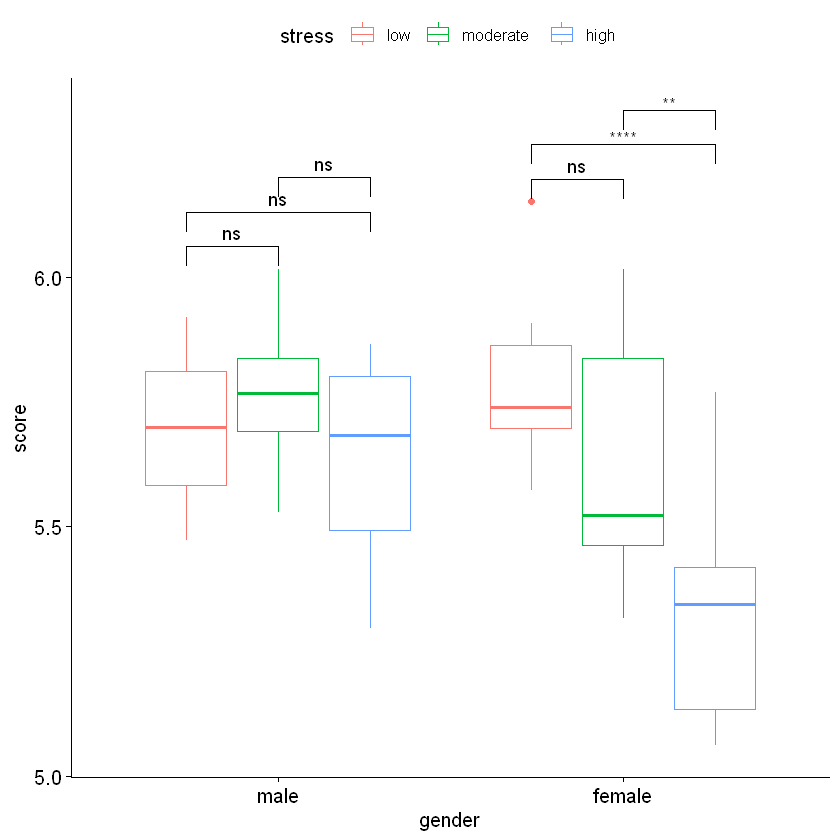

In [15]:
pwc = pwc %>% add_xy_position(x = "gender")
b + stat_pvalue_manual(pwc)